# Data Science Internship Program organised by Oasis Infobyte(OIBSIP-2023)

### Author: Himanshu Shekatkar

## Task-5 Sales Prediction using Python

### Batch: April Phase 2 OIBSIP

### Inserting Packages and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')

### Import Dataset

In [2]:
sales=pd.read_csv("Advertising.csv")

In [3]:
sales.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
sales.shape

(200, 5)

### Datatype Transformation

In [6]:
sales['TV']=sales['TV'].astype(int)

In [7]:
sales['Radio']=sales['Radio'].astype(int)

In [8]:
sales['Newspaper']=sales['Newspaper'].astype(int)

In [9]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.00000,200.000000,200.000000
mean,100.500000,146.570000,22.79000,30.100000,14.022500
std,57.879185,85.824731,14.82582,21.769233,5.217457
min,1.000000,0.000000,0.00000,0.000000,1.600000
25%,50.750000,73.750000,9.75000,12.000000,10.375000
50%,100.500000,149.000000,22.50000,25.000000,12.900000
75%,150.250000,218.250000,36.00000,45.000000,17.400000
max,200.000000,296.000000,49.00000,114.000000,27.000000


In [10]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
sales.sum()

Unnamed: 0    20100.0
TV            29314.0
Radio          4558.0
Newspaper      6020.0
Sales          2804.5
dtype: float64

In [12]:
sales['Sales'].sum()

2804.5

In [13]:
sales['TV'].sum()

29314

### Exploratory Data Analysis

<Axes: xlabel='Sales', ylabel='TV'>

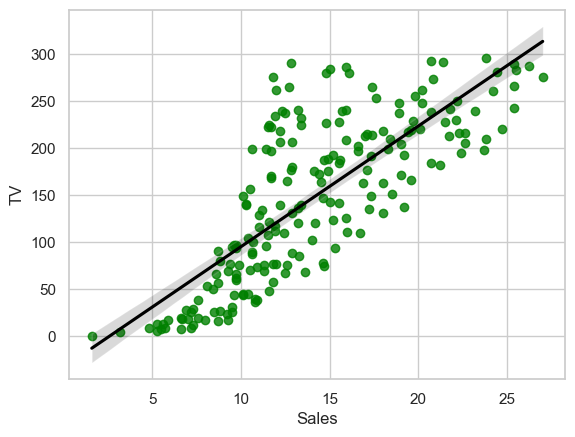

In [14]:
sns.regplot(x='Sales',y='TV',data=sales,scatter_kws={'color':'green'},line_kws={'color':'black'})

### Graph showing sales of TV

<Axes: xlabel='Sales', ylabel='Radio'>

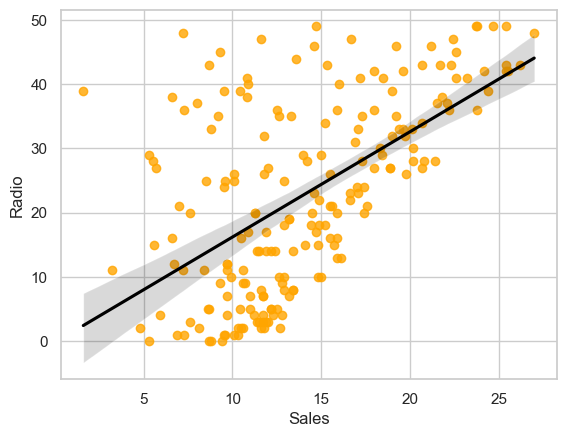

In [15]:
sns.regplot(x='Sales',y='Radio',data=sales,scatter_kws={'color':'orange'},line_kws={'color':'black'})

### Graph showing sales of Radio

<Axes: xlabel='Sales', ylabel='Newspaper'>

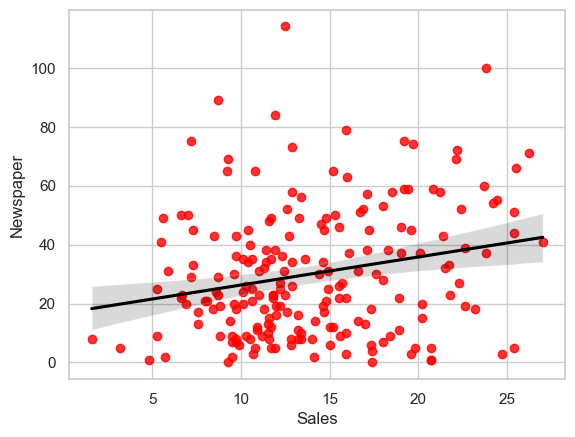

In [16]:
sns.regplot(x='Sales',y='Newspaper',data=sales,scatter_kws={'color':'red'},line_kws={'color':'black'})

### Graph showing sales of Newspaper

In [17]:
plt.rcParams['figure.figsize']=(15,6)

### Heatmap

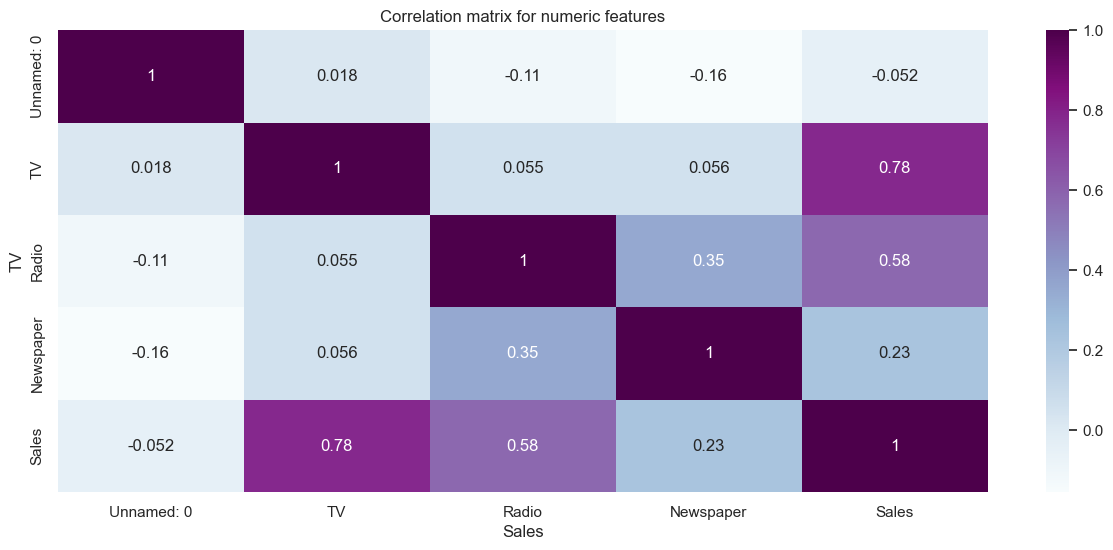

In [18]:
correlation_matrix=sales.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation matrix for numeric features')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

In [19]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230,37,69,22.1
1,2,44,39,45,10.4
2,3,17,45,69,9.3
3,4,151,41,58,18.5
4,5,180,10,58,12.9


### Cleaning

In [20]:
sales = sales.loc[:, ~sales.columns.str.contains('^Unnamed')]

In [21]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230,37,69,22.1
1,44,39,45,10.4
2,17,45,69,9.3
3,151,41,58,18.5
4,180,10,58,12.9


### Pairplot

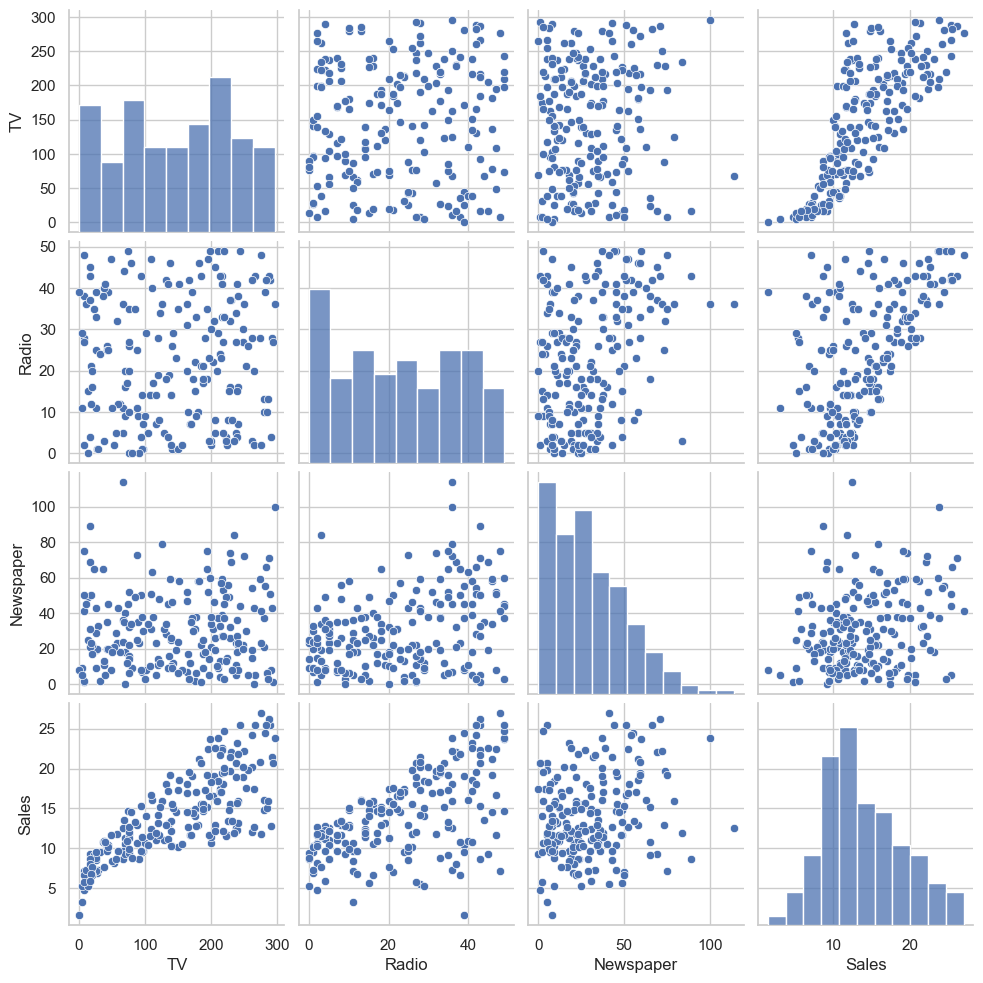

In [22]:
sns.pairplot(sales)

In [23]:
x=sales.drop('Sales',axis=1)

In [24]:
x

,TV,Radio,Newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58
4,180,10,58
...,...,...,...
195,38,3,13
196,94,4,8
197,177,9,6
198,283,42,66


In [25]:
y=sales['Sales']

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Train   Test   Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
Sc=StandardScaler()

In [31]:
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test_scaled)

In [35]:
y_pred

array([11.07681216,  8.56351601,  8.19332397, 24.59309043, 12.9196699 ,
        7.66404856, 13.61253222, 15.98470961, 11.82624851, 17.14453935,
       23.38476623, 10.13536131, 11.43682874, 16.34943729, 12.50010556,
       13.09250726, 19.52827701, 11.72322876, 16.70139511, 18.02205456,
       24.65056864, 10.55931353, 15.97326499, 13.32370069,  6.98746656,
       16.0489387 , 13.31193286, 21.62710571, 14.33892798, 10.07532742,
       13.79187513, 21.98838842, 18.76737565, 21.84219359,  7.66013785,
        7.36767418,  9.08167899, 13.86260934, 15.52328648,  7.46578075])

### Model Training

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(y_test,y_pred)

1.4712440878656179

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_test,y_pred)

5.329335638750568

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test,y_pred)

0.8306504658586293

## got 83% accuracy